In [ ]:
# Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
# Loading dataset

In [3]:
data_set=pd.read_csv('D:/ml programs/diabetes.csv')
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data_set.shape

(768, 9)

In [5]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data_set['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
data_set.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
# seperating data and labels
x=data_set.drop(labels='Outcome',axis=1)
y=data_set['Outcome']
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [9]:
scaler=StandardScaler()
scaler.fit(x)
standardized_data=scaler.transform(x)
print(standardized_data)
x=standardized_data
y=data_set['Outcome']
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      

In [10]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x.shape,x_train.shape,x_test.shape)
print(y_train.shape)

(768, 8) (614, 8) (154, 8)
(614,)


In [11]:
# Training the model
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)
print(x_test.shape)
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)
y_predict=classifier.predict(x_test)
print(y_predict)

(154, 8)
[0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0]


In [12]:
# Model evaluation
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy score of traning data:',training_data_accuracy)
#Accuracy score for test data
#x_test_prediction=classifier.predict(x_test)
#test_data_accuracy=accuracy_score(x_test_prediction,x_test)
#print('Acccuracy score of test data:',test_data_accuracy)

Accuracy score of traning data: 0.7899022801302932


In [14]:
#Making prediction
input_data=(6,148,72,35,0,33.6,0.627,50)
#changing input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#Reshape the array as we are prediction for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#standardize the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)
prediction=classifier.predict(std_data)
print(prediction)

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]


In [15]:
if(prediction==0):
    print('Non-Diabetic')
else:
    print('Diabetic')
    

Diabetic


confusion_matrix of SVM: [[86 15]
 [26 27]]
accuracy of SVM: 73.37662337662337
report: of SVM               precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.64      0.51      0.57        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.73       154



<AxesSubplot:>

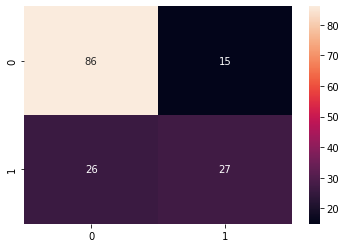

In [33]:
cm=confusion_matrix(y_test,y_predict)
print("confusion_matrix of SVM:",cm)
print("accuracy of SVM:",accuracy_score(y_test,y_predict)*100)
print("report: of SVM",classification_report(y_test,y_predict))
sns.heatmap(cm,annot=True)